In [3]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt

In [4]:
churnData = pd.read_csv('churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [5]:
churnData['TotalCharges'].dtypes

dtype('O')

In [6]:
#pd.DataFrame.dropna?
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce') # '', 'afdfd'

In [7]:
churnData['TotalCharges'].dtype

dtype('float64')

In [8]:
len(churnData['TotalCharges'])

7043

In [9]:
churnData['TotalCharges'].dtype

dtype('float64')

In [10]:
# tenure, SeniorCitizen, MonthlyCharges and TotalCharges
numeric_df= pd.DataFrame(churnData[['tenure','MonthlyCharges', 'TotalCharges','SeniorCitizen']])

In [11]:
numeric_df.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
SeniorCitizen       int64
dtype: object

In [12]:
print(len(numeric_df))
numeric_df.isna().sum()

7043


tenure             0
MonthlyCharges     0
TotalCharges      11
SeniorCitizen      0
dtype: int64

In [13]:
numeric_df.fillna(method='bfill', inplace=True)

In [14]:
len(numeric_df)

7043

In [15]:
churnData['Churn'].replace({'No':0, 'Yes':1}, inplace=True)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numeric_df, churnData['Churn'], test_size=0.2, random_state=123)

In [17]:
X_test['SeniorCitizen'].value_counts()

0    1173
1     236
Name: SeniorCitizen, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state = 1234)
tree_classifier.fit(X_train, y_train);

In [108]:
print('Logistic regression score: ', log_classifier.score(X_test, y_test))

Logistic regression score:  0.7814052519517388


In [10]:
print('Decision tree classifier score: ', tree_classifier.score(X_test, y_test))

Decision tree classifier score:  0.7239176721078779


In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
import sklearn
print(sklearn.show_versions())



System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\oezkan\Anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.7.1
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True
None


In [21]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]


In [23]:
classifier = RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth=3)


In [24]:
classifier = RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth=3)
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.7842441447835344


# Evaluate models with sampling

In [37]:
# sadece hocanin verdigi colonlari kullanacagiz model icin

In [25]:
churnData = pd.read_csv('churn.csv', header=0
                        , usecols=['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen', 'Churn'])

In [26]:
churnData.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges       object
Churn              object
dtype: object

In [27]:
# featureleri ayiralim

In [28]:
X = churnData.iloc[:, :-1]

In [29]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.5
7039,0,72,103.20,7362.9
7040,0,11,29.60,346.45
7041,1,4,74.40,306.6


In [30]:
X.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [31]:
# TotalCharges colonunu numeric veriye cevirdik

In [32]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

In [33]:
X['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [34]:
# null valueleri doldurduk

In [35]:
X['TotalCharges'].isna().sum()

11

In [36]:
X['TotalCharges'].fillna(method='ffill', inplace=True)

In [37]:
X.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [38]:
X.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [39]:
# target degiskeni ayirdik

In [40]:
y = churnData.iloc[:, -1]

In [41]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [42]:
y = pd.get_dummies(y, drop_first=True)

In [43]:
y.columns = ['response']

In [44]:
y.head()

,response
0,0
1,0
2,1
3,0
4,1


In [45]:
y.value_counts()

response
0           5174
1           1869
dtype: int64

In [46]:
5174/ len(y)

0.7346301292063041

In [47]:
# verinin 73 u, 0 categorisine ait, yani imbalanced data

In [48]:
data = pd.concat([X, y], axis = 1)

In [49]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,response
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [50]:
category_0 = data[data['response'] == 0]
category_1 = data[data['response'] == 1]

In [51]:
# downsampling

In [52]:
category_0_down = category_0.sample(len(category_1,))

In [53]:
data = pd.concat([category_0_down, category_1], axis=0, ignore_index=True)
#shuffling the data
data = data.sample(frac=1)
data['response'].value_counts()

1    1869
0    1869
Name: response, dtype: int64

In [54]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,response
2479,0,48,103.25,5037.55,1
3295,1,20,61.60,1174.35,1
2502,0,8,103.35,847.30,1
2853,1,2,93.85,196.75,1
2051,0,45,87.25,3941.70,1


In [55]:
data = data.reset_index().drop('index', axis=1)

In [56]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,response
0,0,48,103.25,5037.55,1
1,1,20,61.60,1174.35,1
2,0,8,103.35,847.30,1
3,1,2,93.85,196.75,1
4,0,45,87.25,3941.70,1


In [57]:
data['response'].value_counts()

1    1869
0    1869
Name: response, dtype: int64

In [58]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
classifier = RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth=3)
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.720855614973262


In [137]:
scaler = StandardScaler()

In [138]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [37]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1151,0,28,76.55,2065.40
538,0,18,101.30,1794.65
351,0,21,94.30,1948.35
1108,0,6,49.25,255.60
1662,1,13,90.50,1201.15


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree_classifier = DecisionTreeClassifier(random_state=42);

In [40]:
tree_classifier.fit(X_train, y_train);

In [41]:
tree_classifier.score(X_test, y_test)

0.6598930481283423

# Upsampling

In [61]:
churnData = pd.read_csv('churn.csv', header=0
                        , usecols=['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen', 'Churn'])

In [62]:
X = churnData.iloc[:, :-1]
y = churnData.iloc[:, -1]

In [63]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

In [64]:
X['TotalCharges'].fillna(method='bfill', inplace=True)
# yes, no , no response, [yes], [no], [no response]
#                         [1]  ,[0], [0]
# x+y+z = 1  --------> z = 1-x-y, 


#                  karar
# yes 123, no 1111
# 1 - prob(yes)^2 - prob(no)^2
#

In [65]:
y = pd.get_dummies(y, drop_first=True)
y.columns = ['response']

In [66]:
data = pd.concat([X, y], axis = 1)

In [67]:
category_0 = data[data['response'] == 0]
category_1 = data[data['response'] == 1]

In [68]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 5)


In [69]:
category_0.shape

(5174, 5)

In [70]:
data = pd.concat([category_0, category_1_up], axis=0, ignore_index=True)
#shuffling the data
data = data.sample(frac=1)
data['response'].value_counts()

1    5174
0    5174
Name: response, dtype: int64

In [71]:
data = data.reset_index().drop('index', axis=1)

In [72]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,response
0,1,7,74.40,527.90,1
1,1,25,89.70,2187.55,1
2,0,4,80.35,307.40,1
3,0,1,79.55,79.55,1
4,0,34,20.65,716.40,0


In [73]:
X = data.iloc[:, :-1]

In [74]:
y = data.iloc[:, -1]

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [80]:
classifier = RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth=3)
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.7352657004830918


In [20]:
tree = DecisionTreeClassifier(max_depth=3)

In [21]:
tree.fit(X_train, y_train);

In [22]:
tree.score(X_test, y_test)

0.7323671497584541

In [23]:
tree.get_depth()

3

In [24]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,50.80,50.80
1,0,47,19.75,948.90
2,0,12,19.00,233.55
3,1,41,99.80,4259.30
4,0,54,20.35,1092.35


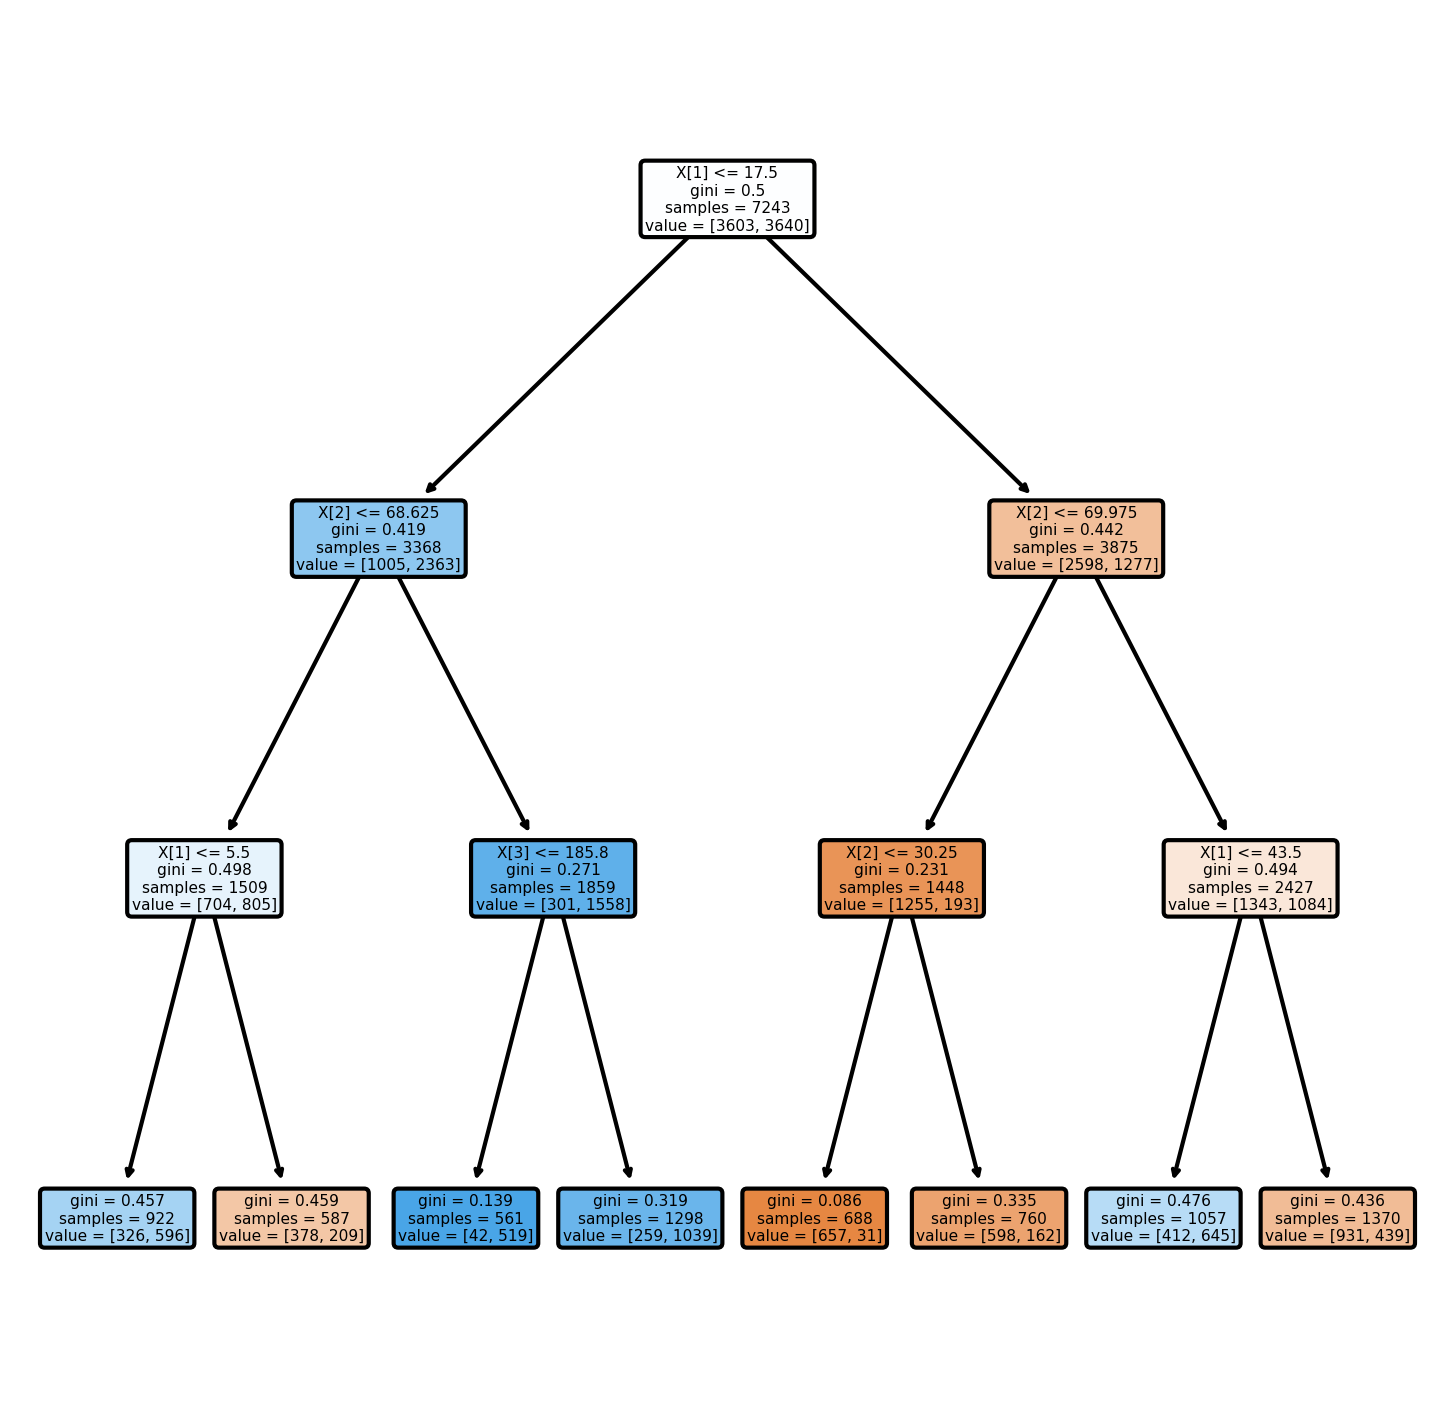

In [25]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6, 6), dpi=300)

plot_tree(tree,filled = True, rounded=True)
plt.show()

model.predict([x, y, x]) --> t

In [32]:
X.shape

(10348, 4)

In [33]:
a = np.array([[0], [57], [100.78], [1009]])

In [34]:
a.shape

(4, 1)

In [39]:
?tree.predict

Signature: tree.predict(X, check_input=True)
Docstring:
Predict class or regression value for X.

For a classification model, the predicted class for each sample in X is
returned. For a regression model, the predicted value based on X is
returned.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csr_matrix``.

check_input : bool, default=True
    Allow to bypass several input checking.
    Don't use this parameter unless you know what you do.

Returns
-------
y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The predicted classes, or the predict values.
File:      c:\programdata\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Type:      method


In [40]:
tree

DecisionTreeClassifier(max_depth=3)

In [53]:
X_new = [[1], [18], [20], [150]]
X_new = np.array(X_new)

In [54]:
X_new.reshape(1, 4).shape

(1, 4)

In [45]:
X.shape

(10348, 4)

In [50]:
tree.predict(X_new.reshape(1, 4))

array([0], dtype=uint8)

In [ ]:
tree.predict()

We take one pseudo-random sample for predicting, the output. According to decision tree it must contained in 5<sup>th</sup> leaf.And the leaf's gini value is best according to our tree, it must contained in 0 class, which is equivalent to negative class i.e is not 'Churn'.